#### Validating the ACE with the RISE which converges after 500 samples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from pairwise.src.pairwise_fitter import Pairwise_fitter
from pairwise.src.pairwise_evaluator import Pairwise_evaluator
import importlib
import src.paper_utils as utils
import src.plot as myplot
import pairwise.src.pairwise_utils as pwutils

In [3]:
importlib.reload(myplot)
importlib.reload(utils)
importlib.reload(pwutils)

<module 'pairwise.src.pairwise_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots_pw/../../pairwise/src/pairwise_utils.py'>

In [4]:
nspin = 121
model_digits = [0,1]
sample_sizes = [500]
testdatas = [np.genfromtxt(utils.load_test_data(digit), dtype=int, delimiter=1) for digit in model_digits]

In [5]:
# ACE
outdir = "../data/OUTPUT/pairwise/OUTPUT_mod"
# outdir = f"../data/OUTPUT/pairwise/OUTPUT_mod_rise/{sample_sizes}/1" #first run

pw_mods = [pwutils.get_pw_mod(i,nspin,outdir) for i in model_digits] # both models were stopped after 100 iterations of the ACE algorithm, 4k samples

ace_distrs = np.empty((2,2,len(testdatas[0])))
for i_dig, testdig in enumerate(testdatas):
    for i_md, mod in enumerate(pw_mods):
        ace_distrs[i_md,i_dig,:] = np.array([mod.calc_energy(state) for state in testdig])

In [6]:
# RISE
# outdir = "../data/OUTPUT/pairwise/OUTPUT_mod"
outdir = f"../data/OUTPUT/pairwise/OUTPUT_mod_rise/train/{sample_sizes[0]}/1" #first run

# outdir = f"../data/OUTPUT/pairwise/OUTPUT_mod_rise/full/6000/10k" #first run

fe = f"_rise_julia.dat"
fname = "train-images-unlabeled-{}"

pw_mods = [pwutils.get_pw_mod(i,nspin,outdir, fileend=fe, fname=fname) for i in model_digits] # both models were stopped after 100 iterations of the ACE algorithm, 4k samples

rise_distr = np.empty((2,2,len(testdatas[0])))
for i_dig, testdig in enumerate(testdatas):
    for i_md, mod in enumerate(pw_mods):
        rise_distr[i_md,i_dig,:] = np.array([mod.calc_energy(state) for state in testdig])


#### Hist

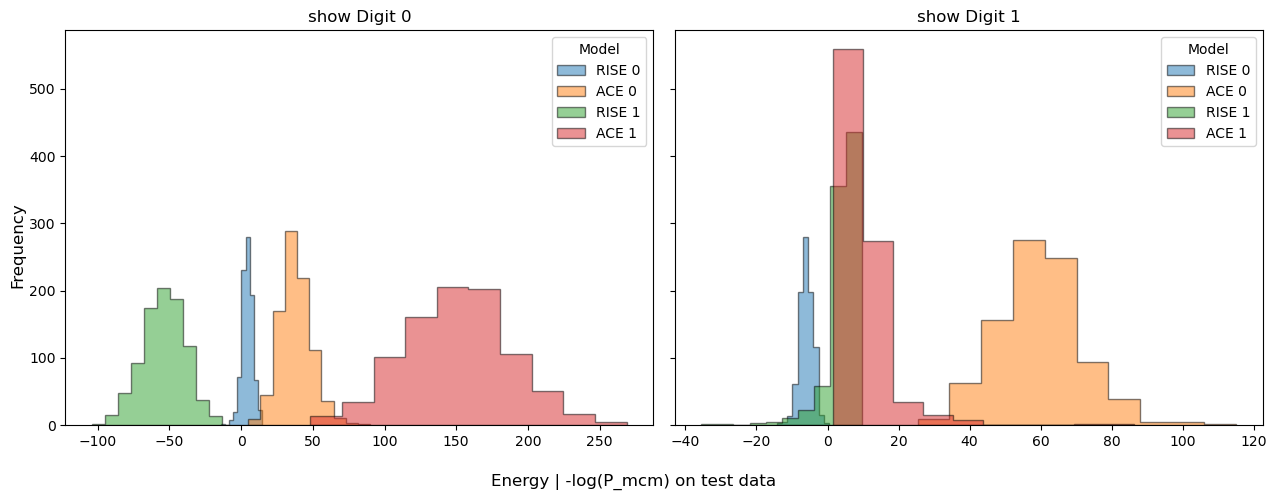

In [7]:
### Now we combine the two



model_digits = [0,1]

fig, axs = plt.subplots(1,2,sharey=True,figsize=((13,5)))

for i_dig, testdig in enumerate(testdatas):
    for i_md in range(2):
        ax = axs[i_dig]
        see_dig = model_digits[i_dig]
        ax.hist(rise_distr[i_md,i_dig,:]*-1,label=f"RISE {i_md}",alpha=.5,histtype="stepfilled",edgecolor="black")
        ax.hist(ace_distrs[i_md,i_dig],label=f"ACE {i_md}",alpha=.5,histtype="stepfilled",edgecolor="black")

    ax.set_title(f"show Digit {see_dig}")
    ax.legend(title="Model")
fig.supxlabel("Energy | -log(P_mcm) on test data")
fig.supylabel("Frequency")
# fig.suptitle("PW model build")
fig.tight_layout()
plt.show()

Do both models produce the same values?: MCM vs PW scatter

0 0
1 0
0 1
1 1


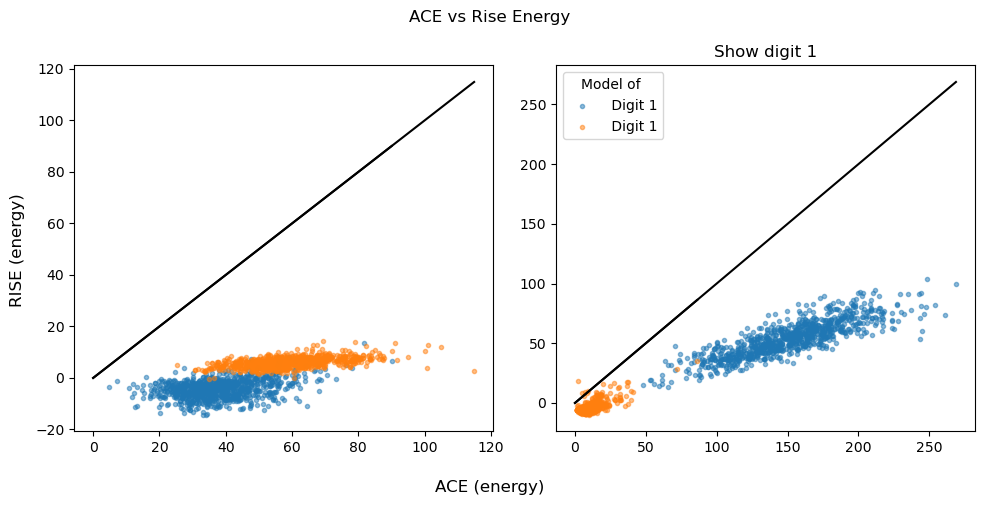

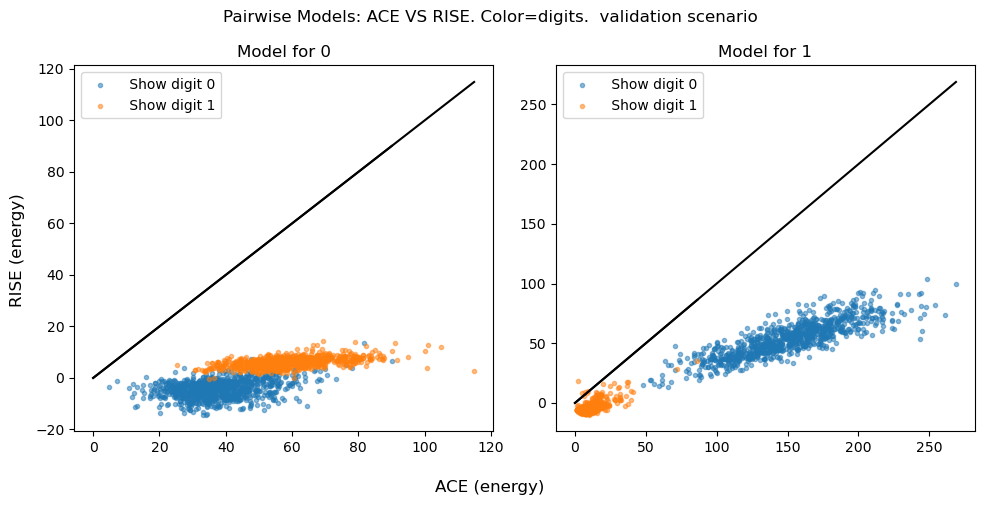

In [36]:
# lets scatter all points of both categories. Make them different colors based on point and x = MCM y = PW

### Now we combine the two



model_digits = [0,1]

fig, axs = plt.subplots(1,2,figsize=((10,5)))



for i_dig, testdig in enumerate(testdatas):
    for i_md in range(2):
        ax = axs[i_md]
        see_dig = model_digits[i_md]
        # print(i_dig, i_md)
        ax.scatter(ace_distrs[i_md,i_dig,:],rise_distr[i_md,i_dig],label=f" Show digit {i_dig}",alpha=.5,marker=".")


        lm =  np.max([np.max(arr) for arr in (ace_distrs[i_md,i_dig,:],rise_distr[i_md,i_dig])])
        ax.plot((0,lm),(0,lm),color="black")
        # ax.set(adjustable='box', aspect='equal')

        ax.set_title(f"Model for {see_dig}")
        ax.legend()
fig.supxlabel("ACE (energy)")
fig.supylabel(f"RISE (energy)")
fig.suptitle(f"Pairwise Models: ACE VS RISE. Color=digits.  validation scenario")
fig.tight_layout()

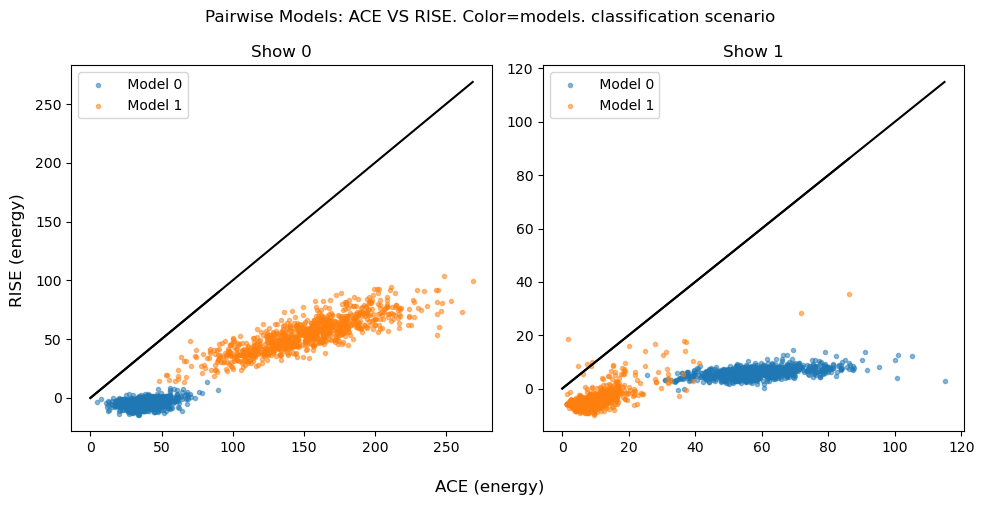

In [35]:
# lets scatter all points of both categories. Make them different colors based on point and x = MCM y = PW

### Now we combine the two



model_digits = [0,1]

fig, axs = plt.subplots(1,2,figsize=((10,5)))



for i_dig, testdig in enumerate(testdatas):
    for i_md in range(2):
        ax = axs[i_dig]
        see_dig = model_digits[i_dig]
        # print(i_dig, i_md)
        ax.scatter(ace_distrs[i_md,i_dig,:],rise_distr[i_md,i_dig],label=f" Model {i_md}",alpha=.5,marker=".")


        lm =  np.max([np.max(arr) for arr in (ace_distrs[i_md,i_dig,:],rise_distr[i_md,i_dig])])
        ax.plot((0,lm),(0,lm),color="black")
        # ax.set(adjustable='box', aspect='equal')

        ax.set_title(f"Show {see_dig}")
        ax.legend()
fig.supxlabel("ACE (energy)")
fig.supylabel(f"RISE (energy)")
fig.suptitle(f"Pairwise Models: ACE VS RISE. Color=models. classification scenario")
fig.tight_layout()